As a data scientist working at Apollo 24/7, the ultimate goal is to tease out meaningful and actionable insights from Patient-level collected data.

You can help Apollo hospitals to be more efficient, to influence diagnostic and treatment processes, to map the spread of a pandemic.

How can you help here?

The company wants to know:

• Which variables are significant in predicting the reason for hospitalization for different regions

• How well some variables like viral load, smoking, Severity Level describe the hospitalization charges

Column Profiling

Age: This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).

Sex: This is the policy holder's gender, either male or female

Viral Load: Viral load refers to the amount of virus in an infected person's blood

Severity Level: This is an integer indicating how severe the patient is

Smoker: This is yes or no depending on whether the insured regularly smokes tobacco.

Region: This is the beneficiary's place of residence in Delhi, divided into four geographic regions - northeast, southeast, southwest, or northwest

Hospitalization charges: Individual medical costs billed to health insurance
Concept Used:

Graphical and Non-Graphical Analysis

2-sample t-test: testing for difference across populations
ANOVA
Chi-square

How to begin:

Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset

Try establishing a relation between the dependent and independent variable (Dependent “hospitalization charges” & Independent: Smoker, Severity Level etc)

Statistical Analysis:

Prove (or disprove) that the hospitalization of people who do smoking is greater than those who don't? (T-test Right tailed)

Prove (or disprove) with statistical evidence that the viral load of females is different from that of males (T-test Two tailed)

Is the proportion of smoking significantly different across different regions? (Chi-square)

Is the mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level the same? Explain your answer with statistical evidence (One way Anova)
Set up Null Hypothesis (H0)
State the alternate hypothesis (H1)

Check assumptions of the test (Normality, Equal Variance). You can check it using Histogram, Q-Q plot or statistical methods like levene’s test, Shapiro-wilk test (optional)

Please continue doing the analysis even If some assumptions fail (levene’s test or Shapiro-wilk test) but double check using visual analysis and report wherever necessary

Set a significance level (alpha)

Calculate test Statistics.

Decision to accept or reject null hypothesis.

Inference from the analysis.



In [165]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.stats.proportion import proportions_ztest # For proportion Z-test
from statsmodels.formula.api import ols # For n-way ANOVA
from statsmodels.stats.anova import anova_lm # For n-way ANOVA
from scipy.stats import chi2_contingency # For Chi-Sq
from scipy import stats


In [166]:
data=pd.read_csv('scaler_apollo_hospitals.csv')

In [167]:
data.head()


,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667


In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1338 non-null   int64  
 1   age                      1338 non-null   int64  
 2   sex                      1338 non-null   object 
 3   smoker                   1338 non-null   object 
 4   region                   1338 non-null   object 
 5   viral load               1338 non-null   float64
 6   severity level           1338 non-null   int64  
 7   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 83.8+ KB


In [169]:
data.describe()

,Unnamed: 0,age,viral load,severity level,hospitalization charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,668.500000,39.207025,10.221233,1.094918,33176.058296
std,386.391641,14.049960,2.032796,1.205493,30275.029296
min,0.000000,18.000000,5.320000,0.000000,2805.000000
25%,334.250000,27.000000,8.762500,0.000000,11851.000000
50%,668.500000,39.000000,10.130000,1.000000,23455.000000
75%,1002.750000,51.000000,11.567500,2.000000,41599.500000
max,1337.000000,64.000000,17.710000,5.000000,159426.000000


In [170]:
data.describe(include=object)

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [171]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [172]:
data['severity level'].unique()

array([0, 1, 3, 2, 5, 4])

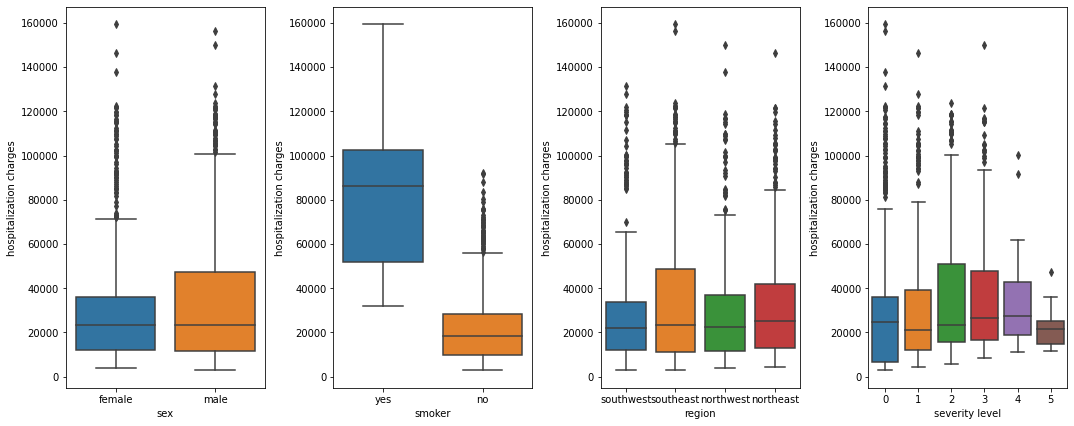

In [173]:
#let's see how categorical variables effect target variable

plt.figure(figsize=(15,6))
categorical_features=list(data.select_dtypes('object').columns)
categorical_features.append('severity level')
                          
for i,j in enumerate(categorical_features):
 plt.subplot(1,len(categorical_features),i+1)
 plt.subplots_adjust(hspace = 0.8)
 sns.boxplot(x=j, y='hospitalization charges', data=data)
 plt.tight_layout(pad=1)

Hospital charges for person who smokes is significantly lower than the person who smokes.

Age & region have no effect as visible from boxplot.

In [174]:
#outlier treatment - IQR
non_cat_columns=list(data.select_dtypes(np.number).columns)
non_cat_columns.remove('severity level')


for i,j in enumerate(non_cat_columns):
 q1=data[j].quantile(0.25)
 q3=data[j].quantile(0.75)
 iqr=q3-q1
 data=data[(data[j]>=q1-1.5*iqr)&(data[j]<=q3+1.5*iqr)]

In [175]:
non_cat_columns

['Unnamed: 0', 'age', 'viral load', 'hospitalization charges']

In [176]:
data.drop('Unnamed: 0',axis='columns',inplace=True)

In [177]:
data.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
1,18,male,no,southeast,11.26,1,4314
2,28,male,no,southeast,11.00,3,11124
3,33,male,no,northwest,7.57,0,54961
4,32,male,no,northwest,9.63,0,9667


**Let's check the effect of other Variables on Target Variable. (Hospitalization charges is our Target Variable.)**

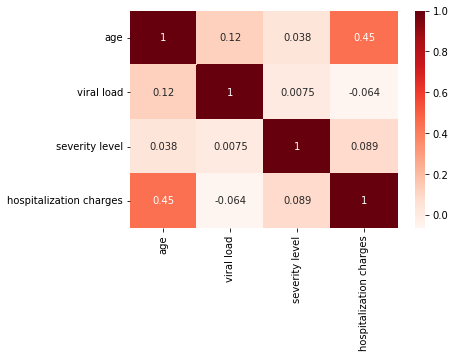

In [178]:
sns.heatmap(data.corr(),annot=True,cmap='Reds')

Hospitalization charges has high correlation with Age.Let's Deep dive in it.

In [179]:
data['age_bins']=pd.cut(x=data['age'], bins=[0,18,28,38,48,58,68,100],labels=['0-18','18-28','28-38','38-48','48-58','58-68','68-100'])

In [180]:
data.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges,age_bins
0,19,female,yes,southwest,9.30,0,42212,18-28
1,18,male,no,southeast,11.26,1,4314,0-18
2,28,male,no,southeast,11.00,3,11124,18-28
3,33,male,no,northwest,7.57,0,54961,28-38
4,32,male,no,northwest,9.63,0,9667,28-38


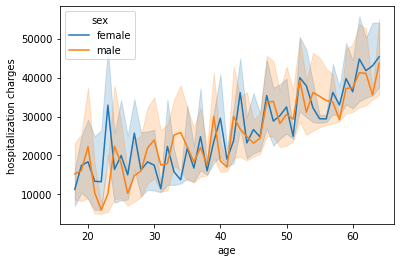

In [181]:
sns.lineplot(x='age',y='hospitalization charges',data=data,hue='sex')

it is clear from above graph that hospitalization charges  Increase with age.

Females has higher charges than Men.

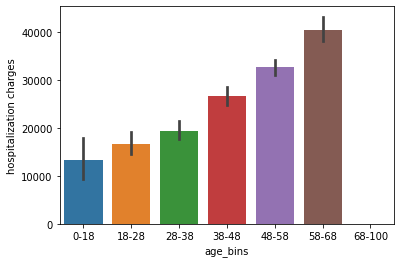

In [182]:
sns.barplot(x='age_bins', y='hospitalization charges', data=data)

In [183]:
data.groupby(['region','sex','smoker']).mean()['hospitalization charges'].unstack()

smoker                      no           yes
region    sex                               
northeast female  24105.053435  48756.263158
          male    21660.096000  56480.500000
northwest female  21967.518519  58942.350000
          male    20801.734848  56219.444444
southeast female  20590.739130  56240.470588
          male    19123.868217  53855.058824
southwest female  19585.122302  54129.909091
          male    19447.293651  50628.571429

#Hypothesis Testing

**1. Prove (or disprove) that the hospitalisation of people who do
smoking is greater than those who don't? (t-test Right tailed)**

We have seen it already In EDA that we have a effect. Let's check through Hypothesis Testing

In [184]:
data.groupby('smoker')['hospitalization charges'].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1055.0,20907.971564,14563.067125,2805.0,9962.5,18313.0,28387.5,83680.0
yes,136.0,54578.154412,13360.849267,32074.0,44663.5,51899.5,61421.5,85758.0


Our Data size is good so we will not check for Normality.

Step 1: Define null and alternative hypothesis

Null Hypothesis : mean 1 <= mean 2 
(The average charges of smokers is less than or equal to nonsmokers)

Alternate Hypothesis: mean 1 > mean 2 
(The average charges of smokers is greater than nonsmokers)

Step 2: Decide the significance level. If P values is less than alpha reject the null hypothesis.
α = 0.05

Step3:
Standard deviation of the population is not known ,will perform a T stat test . The > sign in alternate
hypothesis indicate test is right tailed, that is all z values that would cause us to reject null hypothesis
are in just one tail to the right of sampling distribution curve. 
if it would have been 'not equal to' then we would have used two-sided test.

In hypothesis testing, it is important to keep sample size same. This is because we have maximum power at that point. so we will take 136 rows from both dataset.

In [185]:
smoker=data[data['smoker']=='yes']['hospitalization charges'].sample(136)
non_smoker=data[data['smoker']=='no']['hospitalization charges'].sample(136)


Variance of the population was not given to us. so it would have been there we would have used Z-TEST. 

Also when we calculate Variance above, we got Unequal std. dev. so we will keep it as False.

we have already decided in alternate hypothesis that mean(smoker)>mean(non_smoker) so this will reflect in our code as alternative='greater'.
 
if, alt hypotheis is mean(smoker)<mean(non_smoker) then alternative='less'.

if alt hypotheis is mean(smoker) not equal to mean(non_smoker) then alternative='two sided'---------- This is default 

In [186]:
alpha=0.05
#t_statistic, p_value = stats.ttest_ind(smoker, non_smoker,equal_var=False,alternative='greater') #correct code but not running in colab.here we don't need to divide by 2 to get p_value_onetail
t_statistic, p_value = stats.ttest_ind(smoker, non_smoker,equal_var=False)
#equal_var=False --> welch test--> doesn't assume variance to be equal
p_value_onetail=p_value/2
print("Test statistic = {} , Pvalue ={} , OnetailPvalue = {}".format(t_statistic,p_value,p_value_onetail))

Test statistic = 19.80179301976759 , Pvalue =2.3413767674874478e-54 , OnetailPvalue = 1.1706883837437239e-54


Here we are doing right sided test. so we will check for p_value_onetail. We can clearly see that it is less than alpha. **so we reject the null Hypopthesis.**

**2. Prove (or disprove) with statistical evidence that the
viral load of females is different from that of males**

In [187]:
data.groupby('sex')['viral load'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,610.0,9.966541,1.96940,5.60,8.585,9.855,11.1725,15.58
male,581.0,10.030947,1.94495,5.32,8.600,9.940,11.2900,15.51


In [188]:
male=data[data['sex']=='male']['viral load'].sample(581)
female=data[data['sex']=='female']['viral load'].sample(581)

Step 1: Define null and alternative hypothesis

Null hypothesis: No difference in the viral load of females and males

Alternate hypothesis: Difference in the viral load of females and males

Step 2: Decide the significance level. If P values is less than alpha reject the null hypothesis.

α = 0.05

Step3:

Standard deviation of the population is not known ,will perform a T stat test. Not equal to sign in alternate.

hypothesis indicate its a two tailed test.

𝐻0 : 𝜇1 = 𝜇2

𝐻𝑎: 𝜇1 != 𝜇2

In [189]:
alpha=0.05
t_statistic, p_value = stats.ttest_ind(male, female)

# Alternative='two-sided' is default.so need to enter in the code

In [190]:
print("Test statistic = {} , Pvalue ={} ".format(t_statistic,p_value ))

Test statistic = 0.7556661410727479 , Pvalue =0.4500028029474129 


we fail to reject the Null hypothesis.so gender has no role in Viral load

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


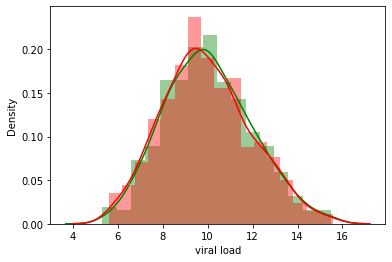

In [191]:
sns.distplot(male,color='green')
sns.distplot(female,color='red')

#**Chi-Squared Test**
(Both are categorical variables)

(**Test of independence. We are checking whether region and smoking has a relation.**)
3. Is the proportion of smoking significantly different
across different regions?

Null Hypothesis: Smokers proportions is same across of regions

Alternate Hypothesis: Smokers proportions is different across different regions

In [192]:
contigency= pd.crosstab(data.region, data.smoker)
contigency

smoker,no,yes
region,,
northeast,256,39
northwest,267,38
southeast,267,34
southwest,265,25


In [193]:
# Using the chi2_contingency test
chi2, pval, dof, exp_freq = chi2_contingency(contigency, correction = False)
print("chi-square statistic: {} , Pvalue: {} , Degree of freedom: {} ,expected frequency:{} ".format(chi2, pval, dof, exp_freq))



chi-square statistic: 3.5220357595425758 , Pvalue: 0.31791538258247426 , Degree of freedom: 3 ,expected frequency:[[261.31402183  33.68597817]
 [270.17212427  34.82787573]
 [266.62888329  34.37111671]
 [256.88497061  33.11502939]] 


WE CAN'T REJECT THE NULL HYPOTHESIS AS P_VALUE IS LARGE.

#**ANOVA TEST**
4. Is the mean viral load of women with 0 Severity level ,
1 Severity level, and 2 Severity level the same? Explain
your answer with statistical evidence.


NULL HYPOTHESIS: 
μ1 = μ2 = μ3 The mean viral load of women with no severity level , one severity level,two severity level is same.

ALTERNATIVE HYPOTHESIS:
Atleast one of mean viral load of women is not same


In [194]:
#Filter data for women
data[data['sex']=='female'].groupby('severity level')['viral load'].describe().head(3)

,count,mean,std,min,25%,50%,75%,max
severity level,,,,,,,,
0,268.0,9.963209,1.936862,5.76,8.6075,9.695,11.1300,14.92
1,147.0,9.908844,1.918987,5.60,8.6000,9.670,11.1300,15.36
2,106.0,9.945000,2.092305,5.73,8.3450,10.060,11.2025,15.57


In [164]:
df_female_severe=data[data['sex']=='female'].loc[data[data['sex']=='female']['severity level']<=2]

In [195]:
df_female_severe.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges,age_bins
0,19,female,yes,southwest,9.30,0,42212,18-28
5,31,female,no,southeast,8.58,0,9392,28-38
6,46,female,no,southeast,11.15,1,20601,38-48
9,60,female,no,northwest,8.61,0,72308,58-68
11,62,female,yes,southeast,8.76,0,69522,58-68


Assumptions Test for Anova

Shapiro-Wilk’s test
We will test the null hypothesis:
viral load follows normal distribution

against the 

alternative hypothesis:
viral load doesn't follow normal distribution

In [196]:
from scipy.stats import shapiro
# find the p-value
w, p_value = shapiro(df_female_severe['viral load'])
print('The p-value is', p_value)

The p-value is 0.006814346183091402


Null Hypothesis is False. i.e. it doesn't follows normal distribution.We can also test this using EDA.

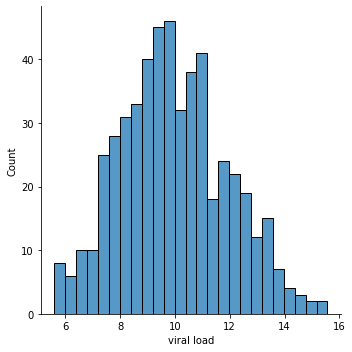

In [197]:
sns.displot(df_female_severe['viral load'],bins=25) 

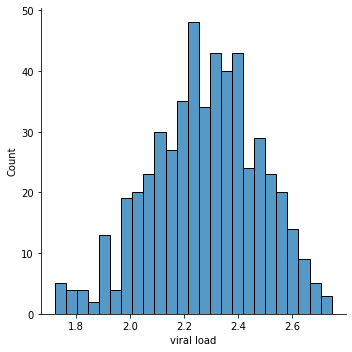

In [199]:
#do log transformation to make it normal distribution
import numpy as np
sns.displot(np.log(df_female_severe['viral load']),bins=25) 

**Another test for normality.**(Shapiro Test)

In [200]:
# same Null & alternate hypothesis as above.
# since previous test was not normal. we will convert to Log-normal and check.

from scipy.stats import shapiro
# find the p-value
w, p_value = shapiro(np.log(df_female_severe['viral load']) )
print('The p-value is', p_value)

The p-value is 0.009911485947668552


Even after we have converted to log normal. it is still not Normal.

Anova is not very sensitive to moderate deviations from normality. so we will continue doing the Analysis. This is because when you take a large
number of random samples from a population, the means of those samples are approximately normally
distributed even when the population is not normal

Levene’s test

We will test the 

null hypothesis
: All the viral load variances are equal

against the 

alternative hypothesis
: At least one variance is different from the rest.

In [213]:
from scipy.stats import levene
statistic, p_value = levene(df_female_severe[df_female_severe['severity level']==0]['viral load'].sample(106),
 df_female_severe[df_female_severe['severity level']==1]['viral load'].sample(106),
 df_female_severe[df_female_severe['severity level']==2]['viral load'].sample(106))
# find the p-value
print('The p-value is ',p_value)

The p-value is  0.5708105192578266


It is high means Null hypothesis is true. All the viral load variances are equal. It was evident from Above also where we saw that std. dev was close to each other.so Variance will also be close

**Anova Test**

In [215]:
from scipy.stats import f_oneway
# find the p-value
test_stat, p_value = f_oneway(df_female_severe[df_female_severe['severity level']==0]['viral load'].sample(106),
 df_female_severe[df_female_severe['severity level']==1]['viral load'].sample(106),
 df_female_severe[df_female_severe['severity level']==2]['viral load'].sample(106))
# print the p-value
print('The p-value is', p_value)

The p-value is 0.8607840504956419


P_value is high. so Null hypothesis is true. i.e means are equal for all severity levels.